Project: Finding the Best Markets to Advertise In

Scenario:
 Running data analysis for an online IT learning platform. They wish to launch a subscription plan of $15 and want to know what two markets to target.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
surveys = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv',low_memory=False)

In [3]:
surveys.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


For the purpose of our analysis, we want to answer questions about a population of new coders that are interested in the subjects we teach. We'd like to know:

 - Where are these new coders located.
 - What are the locations with the greatest number of new coders.
 - How much money new coders are willing to spend on learning.

Before starting to analyze the sample data we have, we need to clarify whether it's representative for our population of interest and it has the right categories of people for our purpose.

In [4]:
#surveys['JobRoleInterest'].head()
jobs_dist ={}
def ext(j):#function to extract jobs from the series
    lis ={} #to store frequency table
    for i in j:
        if ',' not in i and i not in lis:
            lis[i] = 1
        elif ',' in i and len(i)>10:
            multi_jobs = i.split(',')
            for x in multi_jobs:
                job = x.lstrip().rstrip()
                if job not in lis:
                    lis[job]=1
                elif job in lis:
                    lis[job]+=1
        elif i in lis:
            lis[i]+=1
    return lis       
jobs = ext(surveys['JobRoleInterest'].astype(str))


In [5]:
print(jobs)# display the frequency table

{'College professor': 1, 'Library Developer': 1, 'Operating Systems': 1, 'Developer Evangelist': 1, 'Financial Services': 1, 'improving in my current career as a Learning technologist': 1, 'Any of them.': 1, 'Research': 1, 'Embedded hardware': 1, 'Software Engineer': 11, 'IoT': 1, 'Quality Assurance Engineer': 483, 'Technical Writer': 1, 'Java developer': 2, 'SWE': 1, 'Game Developer': 1628, 'software engineer': 1, 'Robotics Process Automation Specialist': 1, 'Networking': 1, '  User Experience Designer': 52, 'Systems Engineer': 1, 'Back-End Web Developer': 2772, 'Tech lobbiest': 1, 'Artificial Intelligence Engineer': 1, 'philosopher': 1, 'Data Visualization Specialist': 1, 'game': 1, 'Not sure': 2, 'Program Manager': 1, 'Cybersecurity': 1, 'User Interface Designer': 2, 'Desktop applications developer': 1, 'Information Technology': 1, 'Entreprenuer / Web Dev Hustler': 1, 'Network Engineer': 1, 'Urban Planner': 1, 'Physicist ': 1, 'Bioinformatitian': 1, 'milatary engineer': 1, '  Mobile

In [6]:
#Convert to percentages
job_df = pd.DataFrame(columns=['jobs'],index=jobs.keys())
job_df['jobs']=jobs.values()

In [7]:
job_df.sort_values('jobs',ascending=False)

,jobs
nan,11183
Full-Stack Web Developer,4198
Front-End Web Developer,3083
Back-End Web Developer,2772
Mobile Developer,2187
Game Developer,1628
Data Scientist,1491
User Experience Designer,1417
Information Security,1326
Data Engineer,1248


In [8]:
surveys['JobRoleInterest'].head()


0                                                  NaN
1                             Full-Stack Web Developer
2      Front-End Web Developer, Back-End Web Develo...
3      Front-End Web Developer, Full-Stack Web Deve...
4    Full-Stack Web Developer, Information Security...
Name: JobRoleInterest, dtype: object

People can be interested in more than one subject.

In [9]:
job_df_no_na = job_df[job_df.index!='nan']#removing empty fields

In [10]:
# calculating the percentage of interest per job
total = job_df_no_na['jobs'].sum()
percentages = job_df_no_na['jobs'].sort_values().apply(lambda a: (a/total)*100)

In [11]:
percentages.sort_values(ascending=False)

Full-Stack Web Developer                                     18.575221
Front-End Web Developer                                      13.641593
Back-End Web Developer                                       12.265487
Mobile Developer                                              9.676991
Game Developer                                                7.203540
Data Scientist                                                6.597345
User Experience Designer                                      6.269912
Information Security                                          5.867257
Data Engineer                                                 5.522124
DevOps / SysAdmin                                             3.942478
Product Manager                                               3.358407
Quality Assurance Engineer                                    2.137168
  Front-End Web Developer                                     1.991150
  Data Scientist                                              0.672566
  Mobi

Now that we found out that the sample has the right categories of people for our purpose, we can begin analyzing it. We can start with finding out where these new coders are located, and what are the densities (how many coders there are) for each location.

The data set provides information about the location of each participant at a country level. The CountryCitizen variable describes the country of origin for each participant, and the CountryLive variable describes what country each participants lives in (which may be different than the origin country).

For our analysis, we'll work with the CountryLive variable because we're interested where people actually live at the moment when we run the ads. In other words, we're interested where people are located, not where they were born.

Because the data set provides information at a country level, we can think of each country as an individual market. This means we can frame our goal as finding the two best countries to advertise in.

One indicator of a good market is the number of potential customers — the more potential customers in a market, the better. If our ads manage to convince 10% of the 5000 potential customers in market A to buy our product, then this is better than convincing 100% of the 30 potential customers in market B.

In [12]:
surveys['CountryLive'].value_counts()

United States of America         5791
India                            1400
United Kingdom                    757
Canada                            616
Brazil                            364
Germany                           324
Poland                            265
Russia                            263
Australia                         259
France                            228
Spain                             217
Nigeria                           214
Ukraine                           202
Romania                           171
Italy                             164
Mexico                            155
Netherlands (Holland, Europe)     142
Philippines                       135
South Africa                      126
Turkey                            120
Greece                            116
Serbia                            115
Argentina                         113
Pakistan                          109
Kenya                              92
Indonesia                          91
China       

USA and India are the most frequent countries according to the dataset. But the analysis cant stop here.

We need to go more in depth with our analysis before taking a decision. We can continue by figuring out how much money new coders are actually willing to spend on learning. 

*Advertising within markets where most people are only willing to learn for free is extremely unlikely to be profitable for us.

The **MoneyForLearning** column describes in American dollars the amount of money spent by participants from the moment they started coding until the moment they completed the survey. Our company sells subscriptions at a price of $59 per month, and for this reason we're interested in finding out how much money each student spends per month.

It also seems like a good idea to narrow down our analysis to only four countries: the US, India, the United Kingdom, and Canada. Two reasons for this decision are:

These are the countries having the highest absolute frequencies in our sample, which means we have a decent amount of data for each.
Our courses are written in English, and English is an official language in all these four countries. The more people that know English, the better our chances to target the right people with our ads.

In [13]:
surveys['MonthsProgramming'].dtype

dtype('float64')

Creating a new column that describes the amount of money a student has spent per month (at the moment they completed the survey).

Will need to divide the **MoneyForLearning** column to the **MonthsProgramming** column.

Some students answered that they had been learning to code for 0 months (it might be that they had just started when they completed the survey). To avoid dividing by 0, replace all the values of 0 with 1.

In [14]:
surveys['MonthsProgramming']=surveys['MonthsProgramming'].replace({0:1})

In [15]:
#confirming that 0 was replaced with 1
surveys[surveys['MonthsProgramming']==0]['MonthsProgramming'].count()

0

In [16]:
surveys['dol_per_month']=surveys['MoneyForLearning']/surveys['MonthsProgramming']

In [17]:
surveys['dol_per_month'].isnull().sum()

1995

There are 1995 null values

In [18]:
surveys = surveys.dropna(subset=['dol_per_month','CountryLive'])

Removed rows with null values in columns 'dol_per_month' and 'CountryLive'

In [19]:
surveys.groupby('CountryLive')['dol_per_month'].agg(['mean','median']).sort_values('mean',ascending=False)

,mean,median
CountryLive,,
Yemen,5000.000000,5000.000000
Puerto Rico,2157.500000,3.452381
Jamaica,518.247863,0.000000
Spain,419.243757,2.607143
Austria,397.392153,5.217391
Malawi,378.583333,378.583333
New Zealand,285.678857,3.750000
Niger,270.082143,3.625000
Luxembourg,219.136142,19.230769


The means look off. There are extreme outliers; like Yemen and Puerto Rico.

- The results for the United Kingdom and Canada are surprisingly low relative to the values we see for India. If we considered a few socio-economical metrics (like GDP per capita), we'd intuitively expect people in the UK and Canada to spend more on learning than people in India.

It might be that we don't have have enough representative data for the United Kingdom, Canada, and India, or we have some outliers (maybe coming from wrong survey answers) making the mean too big for India, or too low for the UK and Canada. Or it might be that the results are correct.

In [20]:
usa = surveys[surveys['CountryLive']=='United States of America']
india = surveys[surveys['CountryLive']=='India']
canada = surveys[surveys['CountryLive']=='Canada']
uk = surveys[surveys['CountryLive']=='United Kingdom']


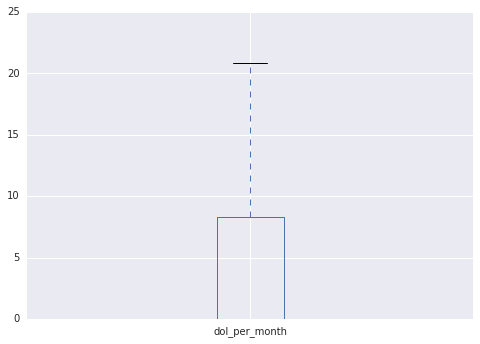

In [21]:
india['dol_per_month'].plot.box(ylim=(0,25))


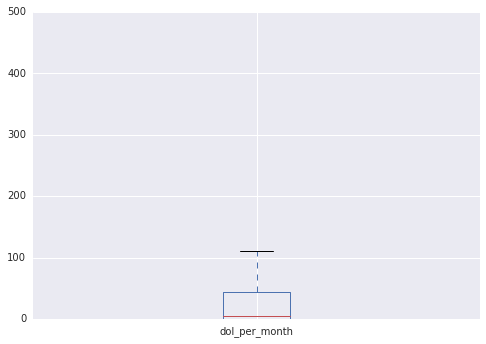

In [22]:
usa['dol_per_month'].plot.box(ylim=(0,500))

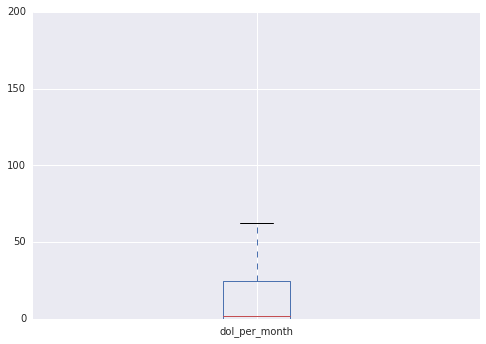

In [23]:
canada['dol_per_month'].plot.box(ylim=(0,200))

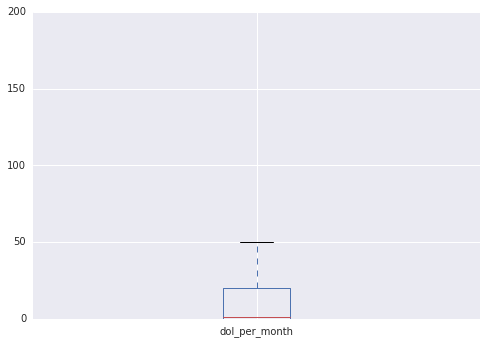

In [24]:
uk['dol_per_month'].plot.box(ylim=(0,200))

The box-plot was used to get the outliers for each country; with regards to the dollars paid per month on learning.

In [25]:
india.shape[0]#before removing the outliers

1221

In [26]:
india = india[india['dol_per_month']<100]
india.shape[0]#after removing outliers

1119

In [27]:
canada.shape[0]#before removing the outliers

578

In [28]:
canada = canada[canada['dol_per_month']<100]
canada.shape[0]#after removing outliers

486

In [29]:
usa.shape[0]#before removing the outliers

5471

In [30]:
usa = usa[usa['dol_per_month']<200]
usa.shape[0]#after removing outliers

4755

In [31]:
uk.shape[0]#before removing the outliers

698

In [32]:
uk = uk[uk['dol_per_month']<100]
uk.shape[0]#after removing outliers

636

In [33]:
uk['dol_per_month'].mean()

10.295413771769498

In [34]:
usa['dol_per_month'].mean()

17.960588244652037

In [35]:
india['dol_per_month'].mean()

6.296648954879147

In [36]:
canada['dol_per_month'].mean()

8.764812272909959

After eliminating the outliers. USA has the most people(4755) paying to learn with the average price of 17.96. This market is recommended first. 

despite the slight difference in average dollars spent on learning between India and the other two; Canada and UK. India has a lot more people paying to learn, 1119  when compared to the numbers from Canada and UK, with 486 and 636 respectively.
But this requires further analysis of stats like the Standard deviation.

In [37]:
canada['dol_per_month'].std(ddof=0)

16.17751449114718

In [38]:
uk['dol_per_month'].std(ddof=0)

19.260763340757972

In [39]:
india['dol_per_month'].std(ddof=0)

15.372176441306149

the standard deviation of india is the least. with this india would be recommended as the second market.